In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
time_folder = "24-07-21"
base_folder = "/data3/lsf/Pein/Power-Prediction/res_output/"

path = base_folder + time_folder + "_result/" + time_folder + "-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
df["train_rmse"] = df["train_rmse"].clip(upper=3000)
df["val_rmse"] = df["val_rmse"].clip(upper=3000)
df["test_rmse"] = df["test_rmse"].clip(upper=3000)

# Display the first few rows of the dataframe
print(df.head())

# remove those rows where the val_rmse and test_rmse are larger than 1000
df = df[df["val_rmse"] <= 1000]
df = df[df["test_rmse"] <= 1000]


           exp_date  train_rmse  train_custom_acc  val_rmse_for_best_train  \
0  2024-07-22 08:20   147.00311         56.489666                498.64645   
1  2024-07-23 04:43   143.06096         54.187660                456.62466   
2  2024-07-22 09:19   212.39352         31.370794                499.47226   
3  2024-07-22 08:35   161.75229         39.631882                439.54453   
4  2024-07-23 03:12   157.37086         38.256252                468.49863   

   val_custom_acc_for_best_train  test_rmse_for_best_train  \
0                     -34.820354                 434.59888   
1                     -29.024147                 398.96490   
2                     -25.899427                 412.86575   
3                     -38.557613                 383.70730   
4                     -60.108784                 396.87503   

   test_custom_acc_for_best_train  train_epoch_for_best_train   val_rmse  \
0                      -30.508827                          19  396.49905   
1     

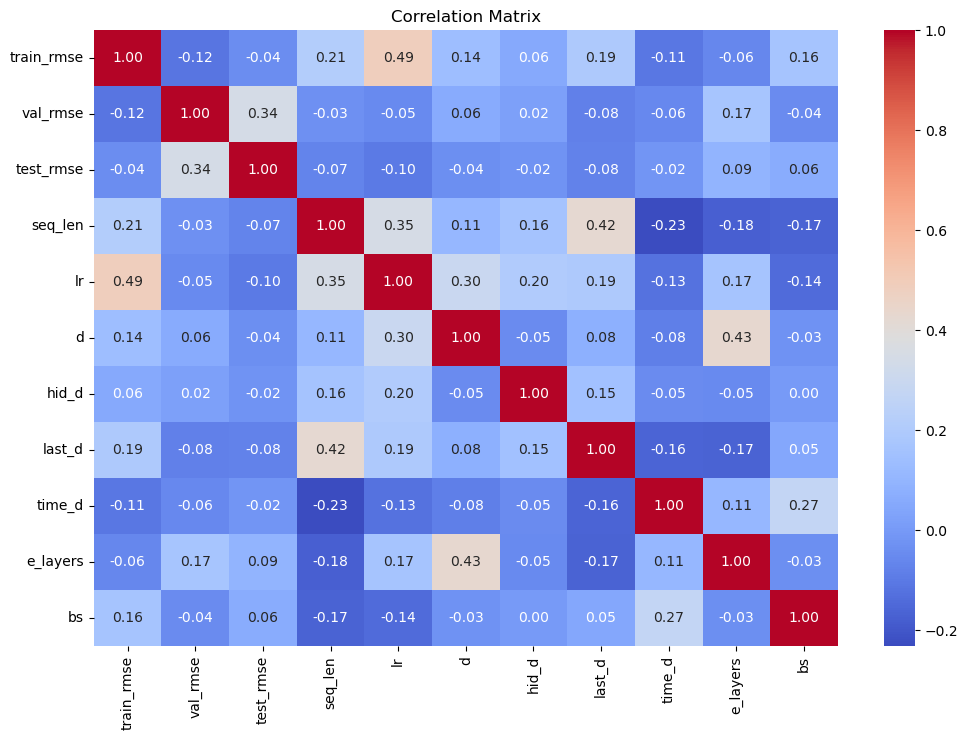

In [3]:
# Correlation matrix
corr_matrix = df[
    [
        "train_rmse",
        "val_rmse",
        "test_rmse",
        "seq_len",
        "lr",
        "d",
        "hid_d",
        "last_d",
        "time_d",
        "e_layers",
        "bs",
    ]
].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [4]:
# # Pairplot to visualize relationships
# sns.pairplot(
#     df[
#         [
#             "train_rmse",
#             "val_rmse",
#             "test_rmse",
#             "seq_len",
#             "lr",
#             "d",
#             "hid_d",
#             "last_d",
#             "time_d",
#             "e_layers",
#             "bs",
#         ]
#     ]
# )
# plt.show()

In [5]:
# # Analyzing the effect of each setting on RMSEs
# fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# # Plotting
# sns.boxplot(ax=axes[0, 0], x="seq_len", y="train_rmse", data=df)
# sns.boxplot(ax=axes[0, 1], x="lr", y="train_rmse", data=df)
# sns.boxplot(ax=axes[0, 2], x="d", y="train_rmse", data=df)
# sns.boxplot(ax=axes[1, 0], x="hid_d", y="train_rmse", data=df)
# sns.boxplot(ax=axes[1, 1], x="last_d", y="train_rmse", data=df)
# sns.boxplot(ax=axes[1, 2], x="time_d", y="train_rmse", data=df)
# sns.boxplot(ax=axes[2, 0], x="e_layers", y="train_rmse", data=df)
# sns.boxplot(ax=axes[2, 1], x="bs", y="train_rmse", data=df)
# sns.boxenplot(ax=axes[2, 2], x="dropout", y="train_rmse", data=df)


# for ax in axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(45)

# plt.tight_layout()
# plt.show()

# # Repeat for val_rmse and test_rmse
# fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# sns.boxplot(ax=axes[0, 0], x="seq_len", y="val_rmse", data=df)
# sns.boxplot(ax=axes[0, 1], x="lr", y="val_rmse", data=df)
# sns.boxplot(ax=axes[0, 2], x="d", y="val_rmse", data=df)
# sns.boxplot(ax=axes[1, 0], x="hid_d", y="val_rmse", data=df)
# sns.boxplot(ax=axes[1, 1], x="last_d", y="val_rmse", data=df)
# sns.boxplot(ax=axes[1, 2], x="time_d", y="val_rmse", data=df)
# sns.boxplot(ax=axes[2, 0], x="e_layers", y="val_rmse", data=df)
# sns.boxplot(ax=axes[2, 1], x="bs", y="val_rmse", data=df)
# sns.boxenplot(ax=axes[2, 2], x="dropout", y="val_rmse", data=df)

# for ax in axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(45)

# plt.tight_layout()
# plt.show()

# fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# sns.boxplot(ax=axes[0, 0], x="seq_len", y="test_rmse", data=df)
# sns.boxplot(ax=axes[0, 1], x="lr", y="test_rmse", data=df)
# sns.boxplot(ax=axes[0, 2], x="d", y="test_rmse", data=df)
# sns.boxplot(ax=axes[1, 0], x="hid_d", y="test_rmse", data=df)
# sns.boxplot(ax=axes[1, 1], x="last_d", y="test_rmse", data=df)
# sns.boxplot(ax=axes[1, 2], x="time_d", y="test_rmse", data=df)
# sns.boxplot(ax=axes[2, 0], x="e_layers", y="test_rmse", data=df)
# sns.boxplot(ax=axes[2, 1], x="bs", y="test_rmse", data=df)
# sns.boxenplot(ax=axes[2, 2], x="dropout", y="test_rmse", data=df)

# for ax in axes.flat:
#     for label in ax.get_xticklabels():
#         label.set_rotation(45)

# plt.tight_layout()
# plt.show()

In [6]:
# Calculate the sum of rmse values for each row

df["sum_rmse"] = 0.2* df["train_rmse"] +0.4* df["val_rmse"] + 0.4* df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="sum_rmse")

# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print


# Drop the specified columns
columns_to_drop = [
    "train_custom_acc_for_best_val",
    "train_custom_acc",
    "val_custom_acc",
    "test_custom_acc",
    "train_custom_acc_for_best_test",
    "val_custom_acc_for_best_train",
    "val_custom_acc_for_best_test",
    "test_custom_acc_for_best_train",
    "test_custom_acc_for_best_val",
]

output = sorted_df.head(top_n).drop(columns=columns_to_drop)



In [8]:

# print last few columns
print(output.iloc[:, -10:])

       d  hid_d  last_d  time_d  e_layers  token_emb_kernel_size comb_type  \
1    351    889     831      97         7                     15       add   
117  128    909    1003     145         7                     11       add   
295  476    643     849     147         9                      7       add   
118  489    629     877      95        19                     14       add   
137  392    653     845     164        14                     13       add   
388  441    688     875     170        20                     12       add   
271  199    654     922     128         4                     14       add   
231  149    752     941     139         3                     12       add   
188  151    710     889     140        11                     11       add   
372  250    589     923     142         7                     12       add   

       bs   dropout    sum_rmse  
1    1100  0.476214  307.350904  
117  1100       NaN  307.933324  
295  1100  0.419695  313.283276  
118  